## Step 3: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. 

1. Design and implement a deep learning model using Keras.
1. Train the model using your synthetic dataset.

Considerations:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

Here is an example of a [published baseline model on this problem][baseline]. ([video][baseline_video])

[baseline]: http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf
[baseline_video]: https://www.youtube.com/watch?v=vGPI_JvLoN0

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
from os import chdir
chdir('..')

### Load preprocessed synthetic data

Use the `load_dataset` function in the `lib.data` module to load the pickled data dictionary containing your synthetic dataset.

In [18]:
from lib.data import load_dataset
your_pickle_file = 'data/notMNIST_concat.pickle'
data_dictionary = load_dataset(your_pickle_file)

Loading pickled data...


In [19]:
print("train_set shape: {}".format(data_dictionary['train_set'].shape))
print("train samples: {}".format(data_dictionary['train_set'].shape[0]))
print("test samples: {}".format(data_dictionary['test_set'].shape[0]))

train_set shape: (95000, 64, 64, 1)
train samples: 95000
test samples: 5000


### Import libraries neccessary to construct your model

In [20]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dense, Activation, Flatten
from keras.utils.visualize_util import model_to_dot

from numpy.random import seed
seed(1337)

In [21]:
batch_size = 25
nb_classes = 10
nb_epoch = 10
nb_filters = 64
image_shape = data_dictionary['train_set'].shape[1:]

### Single-layer CNN in Keras

Construct a single-layer CNN designed for your synthetic dataset.

Train and evaluate this model.

Prepare a plot showing the results of your training.

In [22]:
model = Sequential([
    Convolution2D(*image_shape, border_mode='same', input_shape=image_shape),
    Activation('relu'),
    Flatten(),
    Dense(54),
    Activation('softmax')
])

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [26]:
history = model.fit(data_dictionary['train_set'], 
                    data_dictionary['one_hot_train_labels'],
                    batch_size=batch_size,
                    nb_epoch=2,       
                    shuffle=True,
                    validation_data=(data_dictionary['valid_set'],
                                     data_dictionary['one_hot_valid_labels']))

Train on 95000 samples, validate on 5000 samples
Epoch 1/2
95000/95000 [==============================] - 809s - loss: 67.6000 - val_loss: 67.6161

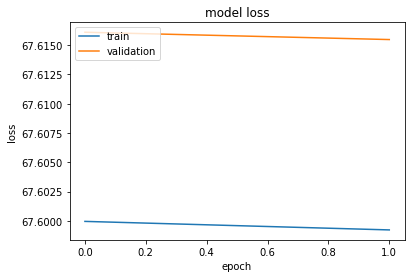

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

### Implement an iteration on your single-layer model

Construct, fit, and train your model, then plot the results of your training.

You may implement multiple iterations. It is recommended that you document each iterated model as part of your own research process.

Be sure to take note of the model you settle on. You will use this model against a more realistic dataset at step 5.

In [31]:
batch_size = 25
nb_classes = 10
nb_epoch = 5
nb_filters = 64
image_shape = data_dictionary['train_set'].shape[1:]

In [32]:
model = Sequential([
    Convolution2D(*image_shape, border_mode='same', input_shape=image_shape),
    Activation('relu'),
    Convolution2D(*image_shape, border_mode='same', input_shape=image_shape),
    Activation('relu'),
    Flatten(),
    Dense(54),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

history = model.fit(data_dictionary['train_set'], 
                    data_dictionary['one_hot_train_labels'],
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,       
                    shuffle=True,
                    validation_data=(data_dictionary['valid_set'],
                                     data_dictionary['one_hot_valid_labels']))

Train on 95000 samples, validate on 5000 samples
Epoch 1/5
10375/95000 [==>...........................] - ETA: 10954s - loss: 70.8467 - acc: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')